
#  Proyecto 3: Procesamiento del Lenguaje Natural


Dataset: The Multilingual Amazon Reviews Corpus

Recuerda descargar el dataset de aquí. Es un archivo .zip que contiene tres documentos. Más información sobre el dataset aquí. Es importante que tengas en cuenta la licencia de este dataset.
Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?
Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. Para pensar: ¿es un problema de Clasificación o de Regresión?

    Haz todas las transformaciones de datos que consideres necesarias. Justifica.
    Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
    Elige un modelo benchmark y compara tus resultados con este modelo.
    Optimiza los hiperparámetros de tu modelo.
    Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

Recomendación: si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería spaCy.
Para pensar, investigar y, opcionalmente, implementar

    ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
    ¿Hay algo que te gustaría investigar o probar?

¡Tómate tiempo para investigar y leer mucho!
    
-----------------------------------------------------------------------------------------------------------
    
    Criterios de Aceptación

Sugerencias para desarrollar el proyecto:

    La resolución del proyecto te puede enfrentar a desafíos que no trabajaste durante las meetings. Es importante que desarrolles la capacidad de resolverlos.
    Todos los pasos deben estar correctamente justificados.
    Las preguntas que se respondan deben estar correctamente explicitadas.
    Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.

Parte A - Exploración de Datos

    El análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.
    Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.
    Justifica cada una de las respuestas.

Parte B - Modelo de Machine Learning

    Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada, justificar su elección y comparar los resultados contra un modelo benchmark.
    Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiper parámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.
    Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar el resultado: ¿coincide con lo que esperabas a partir de tu experiencia con el dataset?

Parte C - Investigación

    Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.) debes mencionarlas.
    Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.

## Analisis Exploratorio

Comenzaré respondiendo algunas preguntas:

Cómo esta compuesto el dataset?

Está balanceado? 

Cuales son las columnas?

Hay valores nulos o duplicados?

Cuales son las palabras más frecuentes según el puntaje en estrellas?

Cuales son las variables más representativas para el modelo?

In [1]:
!pip install nltk
!pip install -U spacy
!python -m spacy download en_core_web_sm
#!python -m nltk.downloader book
!python -m nltk.downloader cess_esp


import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys
import gc

import re

import spacy

#stanza.download("es")
#import stanza


import nltk
nltk.download('wordnet')
from nltk.tokenize import WordPunctTokenizer 
from nltk import SnowballStemmer
from unicodedata import normalize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize



#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\USER\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
data = pd.read_json("C:\data\dataset_es_dev.json",lines=True)

data.info()
data['stars'] = data['stars'].astype(np.int8)

gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


8

In [76]:
data.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [77]:
data.shape()

TypeError: 'tuple' object is not callable

In [78]:
#Exploracion del dataset
data.head()


review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

In [79]:
data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


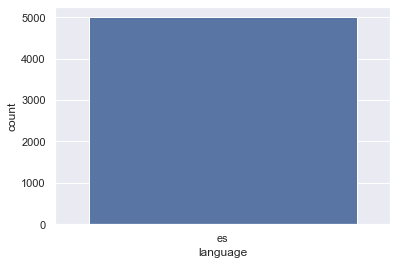

In [80]:
sns.countplot(data.language)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


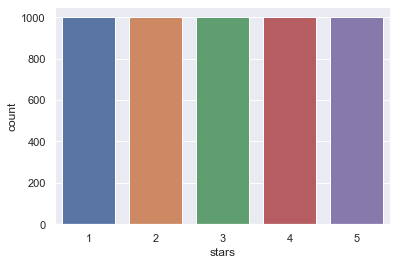

In [81]:
sns.countplot(data.stars)
plt.show()

In [82]:
gc.collect()

4863

In [83]:
##pasamos las variables categoricas a dummies para ver su distribucion, histograma, etc. (esto varia a pesar de que la cant de estrellas es la misma)


product_category_dummies = pd.get_dummies(data['product_category'], prefix='product_category') 
##esto ultimo lo incluye dentro de la misma columna asi sabemos a cual pertenece


data = pd.concat([data,product_category_dummies], axis= 1)
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  \
0                         Mala compra       es          wireless   
1                   No lo he recibido       es           apparel   
2  Que no aprieta bien en el manillar       es            sports   
3               Brocas de mantequilla       es  home_improvement   
4                         No me gusta       es            beauty   

   product_category_apparel  product_category_automotive  ...  \
0                         0                            0  ...   
1                         1                            0  ...   
2                         0                            0  ...   
3                         0                            0  ...   
4                         0                            0  ...   

   product_category_other  product_category_pc  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       0                    0   
4                       0                    0   

   product_category_personal_care_appliances  product_category_pet_products  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   

   product_category_shoes  product_category_sports  product_category_toy  \
0                       0                        0                     0   
1                       0                        0                     0   
2                       0                        1                     0   
3                       0                        0                     0   
4                       0                        0                     0   

   product_category_video_games  product_category_watch  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   product_category_wireless  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 38 columns]

In [84]:
data.dtypes
data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category',
       'product_category_apparel', 'product_category_automotive',
       'product_category_baby_product', 'product_category_beauty',
       'product_category_book', 'product_category_camera',
       'product_category_digital_ebook_purchase', 'product_category_drugstore',
       'product_category_electronics', 'product_category_furniture',
       'product_category_grocery', 'product_category_home',
       'product_category_home_improvement',
       'product_category_industrial_supplies', 'product_category_jewelry',
       'product_category_kitchen', 'product_category_lawn_and_garden',
       'product_category_luggage', 'product_category_musical_instruments',
       'product_category_office_product', 'product_category_other',
       'product_category_pc', 'product_category_personal_care_appliances',
       'product_category_pet_products', 'product_category_shoes

In [85]:

data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category',
       'product_category_apparel', 'product_category_automotive',
       'product_category_baby_product', 'product_category_beauty',
       'product_category_book', 'product_category_camera',
       'product_category_digital_ebook_purchase', 'product_category_drugstore',
       'product_category_electronics', 'product_category_furniture',
       'product_category_grocery', 'product_category_home',
       'product_category_home_improvement',
       'product_category_industrial_supplies', 'product_category_jewelry',
       'product_category_kitchen', 'product_category_lawn_and_garden',
       'product_category_luggage', 'product_category_musical_instruments',
       'product_category_office_product', 'product_category_other',
       'product_category_pc', 'product_category_personal_care_appliances',
       'product_category_pet_products', 'product_category_shoes

In [86]:
data.describe()

stars  product_category_apparel  product_category_automotive  \
count  5000.000000               5000.000000                  5000.000000   
mean      3.000000                  0.026600                     0.034600   
std       1.414355                  0.160927                     0.182783   
min       1.000000                  0.000000                     0.000000   
25%       2.000000                  0.000000                     0.000000   
50%       3.000000                  0.000000                     0.000000   
75%       4.000000                  0.000000                     0.000000   
max       5.000000                  1.000000                     1.000000   

       product_category_baby_product  product_category_beauty  \
count                    5000.000000              5000.000000   
mean                        0.023400                 0.039000   
std                         0.151185                 0.193614   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       product_category_book  product_category_camera  \
count            5000.000000              5000.000000   
mean                0.028400                 0.012800   
std                 0.166129                 0.112422   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       product_category_digital_ebook_purchase  product_category_drugstore  \
count                              5000.000000                 5000.000000   
mean                                  0.010200                    0.027400   
std                                   0.100489                    0.163262   
min                                   0.000000                    0.000000   
25%                                   0.000000                    0.000000   
50%                                   0.000000                    0.000000   
75%                                   0.000000                    0.000000   
max                                   1.000000                    1.000000   

       product_category_electronics  ...  product_category_other  \
count                   5000.000000  ...             5000.000000   
mean                       0.050200  ...                0.020600   
std                        0.218379  ...                0.142055   
min                        0.000000  ...                0.000000   
25%                        0.000000  ...                0.000000   
50%                        0.000000  ...                0.000000   
75%                        0.000000  ...                0.000000   
max                        1.000000  ...                1.000000   

       product_category_pc  product_category_personal_care_appliances  \
count          5000.000000                                 5000.00000   
mean              0.054600                                    0.01540   
std               0.227221                                    0.12315   
min               0.000000                                    0.00000   
25%               0.000000                                    0.00000   
50%               0.000000                                    0.00000   
75%               0.000000                                    0.00000   
max               1.000000                                    1.00000   

       product_category_pet_products  product_category_shoes  \
count                    5000.000000             5000.000000   
mean                        0.017800                0.012000   
std                         0.132237                0

Text(0.5, 1.0, '')

<Figure size 28800x28800 with 0 Axes>

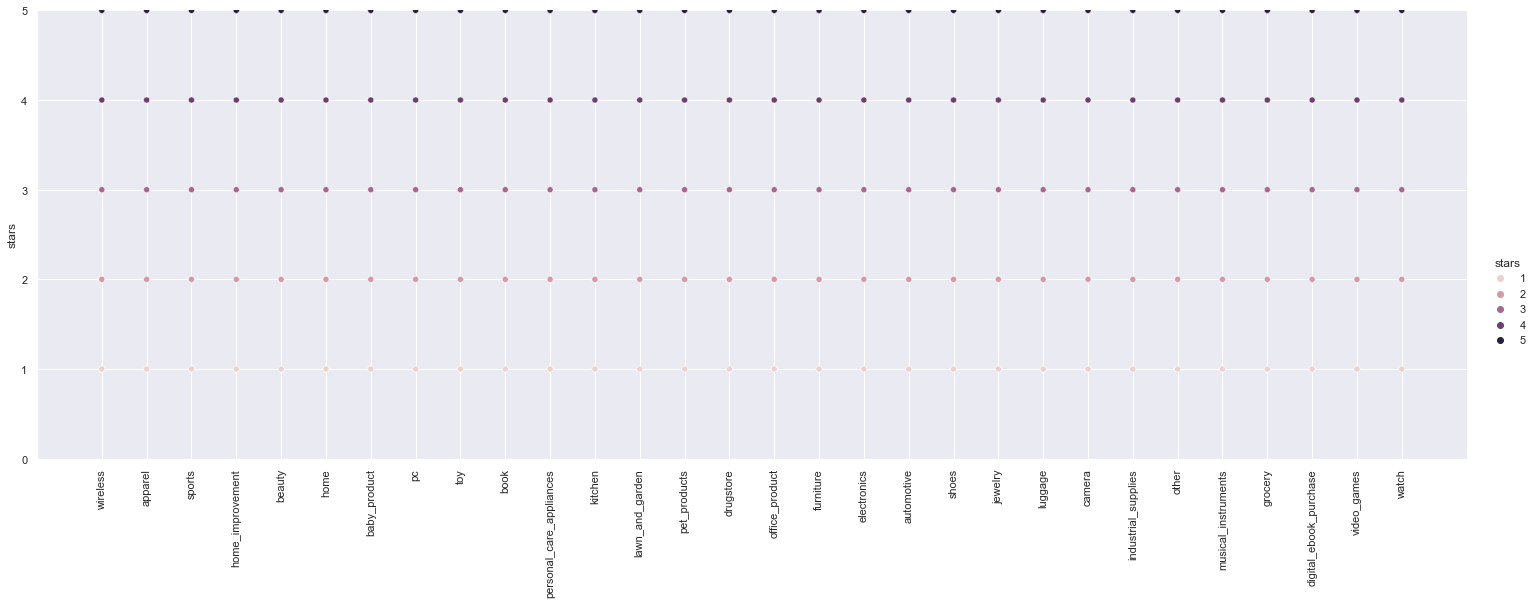

In [87]:
import pandas as pd
import numpy as np

import seaborn as sea
import matplotlib.pyplot as plt

plt.figure(figsize=(400,400))
sea.pairplot(data,x_vars=['product_category'],y_vars=['stars'],hue='stars',height=7, aspect=3, corner = False)
plt.ticklabel_format(style='plain', axis='y') # esta linea me cambia la notacion cientifica del eje 'y'
plt.xticks(rotation=90)
plt.ylim(0,5.000000)
plt.xlabel('')
plt.title('') 

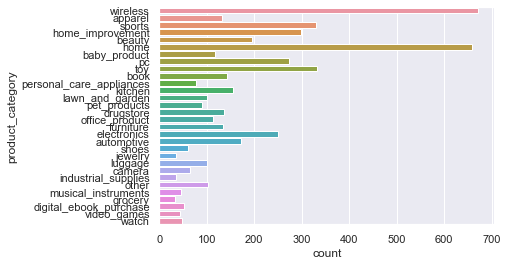

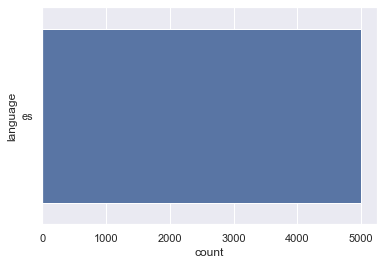

In [88]:

#sns.countplot(data.product_category)

ax1= sns.countplot(y="product_category", data=data)
plt.show()

ax2= sns.countplot(y="language", data=data)
plt.show()


#ax3= sns.countplot(y="stars", data=data)
#plt.show()


##agregar con el hue de stars

In [90]:
gc.collect()

15

Hago el encoding de las variables categoricas y saco las correlaciones generales de la variable a predecir, en este caso las estrellas.

In [91]:
#SE HACE LA MUESTRA CON  data.sample() y se especifica el n= , y la columna si no es de todo general

data.sample(n= 100,['product_category'])

SyntaxError: positional argument follows keyword argument (<ipython-input-91-c12aef272302>, line 3)

In [ ]:
### HACER ENCODING VARIABLES CATEGORICAS

In [92]:
#sns.boxplot(data = data, x = 'property_type', y = 'bathrooms') #surfaced_covered

data.corr()

stars  product_category_apparel  \
stars                                      1.000000                 -0.001758   
product_category_apparel                  -0.001758                  1.000000   
product_category_automotive               -0.020119                 -0.031295   
product_category_baby_product             -0.001871                 -0.025588   
product_category_beauty                    0.018263                 -0.033302   
product_category_book                      0.045122                 -0.028262   
product_category_camera                   -0.002516                 -0.018823   
product_category_digital_ebook_purchase    0.038002                 -0.016781   
product_category_drugstore                -0.003465                 -0.027746   
product_category_electronics               0.005181                 -0.038004   
product_category_furniture                 0.015705                 -0.027537   
product_category_grocery                   0.019212                 -0.013474   
product_category_home                     -0.008779                 -0.064408   
product_category_home_improvement         -0.010736                 -0.041690   
product_category_industrial_supplies      -0.005163                 -0.013678   
product_category_jewelry                   0.008604                 -0.013678   
product_category_kitchen                   0.006507                 -0.029666   
product_category_lawn_and_garden          -0.033173                 -0.023736   
product_category_luggage                   0.029152                 -0.023736   
product_category_musical_instruments      -0.023700                 -0.015929   
product_category_office_product           -0.004778                 -0.025023   
product_category_other                     0.025887                 -0.023974   
product_category_pc                        0.025521                 -0.039727   
product_category_personal_care_appliances  0.003445                 -0.020674   
product_category_pet_products              0.012835                 -0.022254   
product_category_shoes                    -0.005195                 -0.018218   
product_category_sports                   -0.005688                 -0.044015   
product_category_toy                      -0.006248                 -0.044086   
product_category_video_games              -0.004595                 -0.015396   
product_category_watch                    -0.002931                 -0.016103   
product_category_wireless                 -0.043121                 -0.065138   

                                           product_category_automotive  \
stars                                                        -0.020119   
product_category_apparel                                     -0.031295   
product_category_automotive                                   1.000000   
product_category_baby_product                                -0.029304   
product_category_beauty                                      -0.038138   
product_category_book                                        -0.032367   
product_category_camera                                      -0.021557   
product_category_digital_ebook_purchase                      -0.019218   
product_category_drugstore                                   -0.031776   
product_category_electronics                                 -0.043523   
product_category_furniture                                   -0.031536   
product_category_grocery                                     -0.015431   
product_category_home                                        -0.073762   
product_category_home_improvement                            -0.047745   
product_category_industrial_supplies                         -0.015665   
product_category_jewelry                                     -0.015665   
product_category_kitchen                                     -0.033974   
product_category_lawn_and_garden                             -0.027183   
product_category_luggage                       

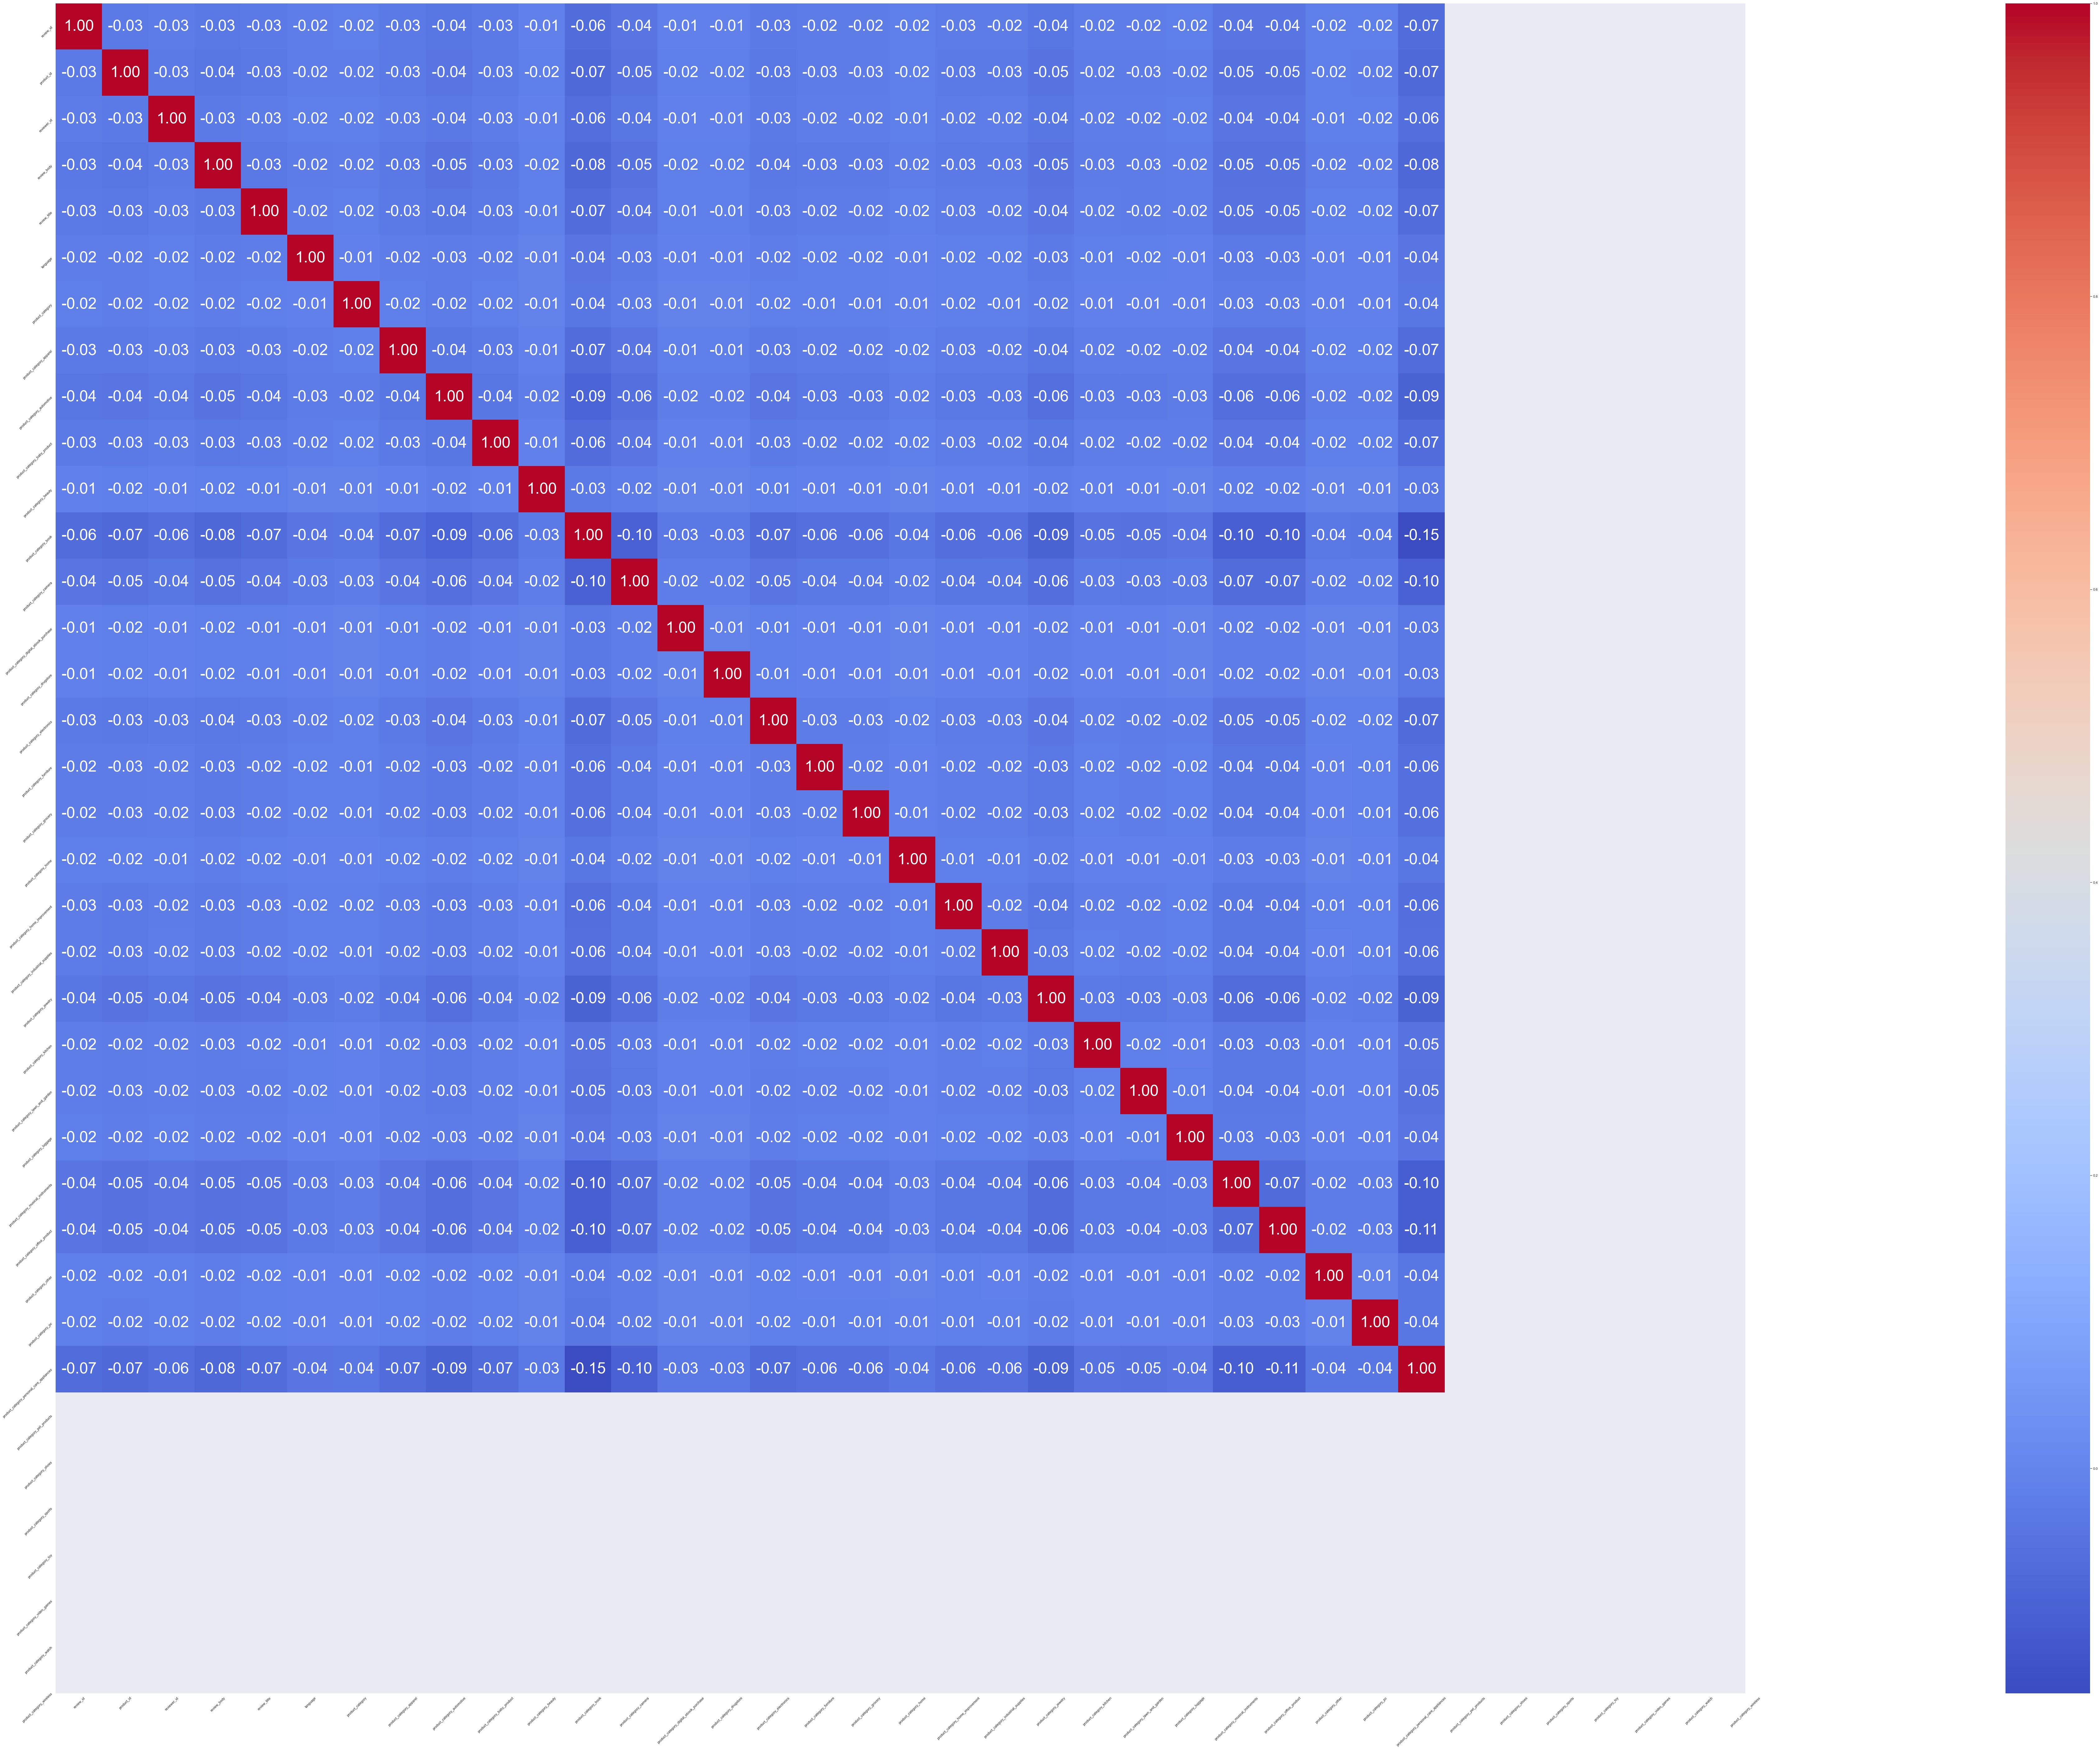

In [93]:
corr = data.drop(columns = 'stars').corr()
plt.figure(figsize=(300,100))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 50},
           xticklabels= data.drop(columns = 'stars').columns, 
           yticklabels= data.drop(columns = 'stars').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


###no hay correlaciones representativas entre el numero de estrellas y el tipo de producto.

In [94]:
data.isnull().sum()

review_id                                    0
product_id                                   0
reviewer_id                                  0
stars                                        0
review_body                                  0
review_title                                 0
language                                     0
product_category                             0
product_category_apparel                     0
product_category_automotive                  0
product_category_baby_product                0
product_category_beauty                      0
product_category_book                        0
product_category_camera                      0
product_category_digital_ebook_purchase      0
product_category_drugstore                   0
product_category_electronics                 0
product_category_furniture                   0
product_category_grocery                     0
product_category_home                        0
product_category_home_improvement            0
product_categ

In [31]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='stars'>

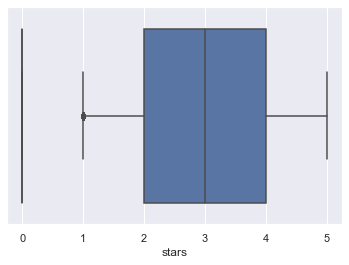

In [41]:
###no hay valores duplicados y tampoco nulos. Veamos los outliers

sns.boxplot(data = data, x = 'product_category_wireless') #surfaced_covered


sns.boxplot(data = data, x = 'stars') #surfaced_covered


#sns.boxplot(data = data, y = 'language')

In [33]:
data.dtypes

review_id                                    object
product_id                                   object
reviewer_id                                  object
stars                                          int8
review_body                                  object
review_title                                 object
language                                     object
product_category                             object
product_category_apparel                      uint8
product_category_automotive                   uint8
product_category_baby_product                 uint8
product_category_beauty                       uint8
product_category_book                         uint8
product_category_camera                       uint8
product_category_digital_ebook_purchase       uint8
product_category_drugstore                    uint8
product_category_electronics                  uint8
product_category_furniture                    uint8
product_category_grocery                      uint8
product_cate

In [42]:
###voy a sacarle los los nombres de las columnas para que no se incluyan despues en el recuento de palabras
## dejamos solo las variables que contienen texto, que son con las que vamos a trabajar.

newdata = data.loc[:,['stars', 'review_body', 'review_title']]
newdata

stars                                        review_body  \
0         1  Malisimo, muy grande demasiado aparatoso y mal...   
1         1          No he recibido el pedido no la devolución   
2         1  Tengo que buscar otro sistema, este no funcion...   
3         1  Utilicé las brocas de menor diámetro y se me d...   
4         1         No me gusta su olor a viejo y aspecto malo   
...     ...                                                ...   
4995      5  Me ha encantado la cesta. Ha llegado impecable...   
4996      5                 Desempeña su función correctamente   
4997      5  Me ha encantado la diadema! Las flores son tal...   
4998      5  A mi me gustan mucho las fundas TPU, ya que so...   
4999      5  El artículo ha cumplido con las expectativas q...   

                            review_title  
0                            Mala compra  
1                      No lo he recibido  
2     Que no aprieta bien en el manillar  
3                  Brocas de mantequilla  
4                            No me gusta  
...                                  ...  
4995                           guadalupe  
4996                      calidad precio  
4997                           Excelente  
4998                              Genial  
4999                       Buena calidad  

[5000 rows x 3 columns]

In [43]:
index_random = np.random.randint(0, high = data.shape)
review_tk = data.iloc[index_random].review_title
print(index_random, review_tk)

[4285    7] 4285    Medio -satisfecha.
7            Tapa pantalla
Name: review_title, dtype: object


In [44]:
data.head()

index_random = np.random.randint(0, high = data.shape)
palabra = data.iloc[index_random].review_body
print(index_random, palabra)

[2934    3] 2934    Tiene buena pinta, pero no he conseguido que s...
3       Utilicé las brocas de menor diámetro y se me d...
Name: review_body, dtype: object


voy a separar en otros dataset segun el numero de estrellas, para despues tokenizarlos y contar la frecuencia
de las palabras:


In [45]:
#separamos en datasets apartes segun las estrellas


#stars1 = data.loc[:,['stars', 'review_body', 'review_title']] | data.loc[data['stars'] == 1 ]

stars1 = data.loc[data['stars'] == 1 ]
stars2 = data.loc[data['stars'] == 2 ]
stars3 = data.loc[data['stars'] == 3 ]
stars4 = data.loc[data['stars'] == 4 ]
stars5 = data.loc[data['stars'] == 5 ]

stars1.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  \
0                         Mala compra       es          wireless   
1                   No lo he recibido       es           apparel   
2  Que no aprieta bien en el manillar       es            sports   
3               Brocas de mantequilla       es  home_improvement   
4                         No me gusta       es            beauty   

   product_category_apparel  product_category_automotive  ...  \
0                         0                            0  ...   
1                         1                            0  ...   
2                         0                            0  ...   
3                         0                            0  ...   
4                         0                            0  ...   

   product_category_other  product_category_pc  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       0                    0   
4                       0                    0   

   product_category_personal_care_appliances  product_category_pet_products  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   

   product_category_shoes  product_category_sports  product_category_toy  \
0                       0                        0                     0   
1                       0                        0                     0   
2                       0                        1                     0   
3                       0                        0                     0   
4                       0                        0                     0   

   product_category_video_games  product_category_watch  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   product_category_wireless  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 38 columns]

In [46]:
#despues de separar dejamos las variables que vamos a usar

stars1 = stars1.loc[:,['stars', 'review_body', 'review_title', 'product_category']]
stars1.head()

stars2 = stars2.loc[:,['stars', 'review_body', 'review_title', 'product_category']]
stars2.head()

stars3 = stars3.loc[:,['stars', 'review_body', 'review_title', 'product_category']]
stars3.head()

stars4 = stars4.loc[:,['stars', 'review_body', 'review_title', 'product_category']]
stars4.head()


stars5 = stars5.loc[:,['stars', 'review_body', 'review_title', 'product_category']]
stars5.head()

stars                                        review_body  \
4000      5  Mi pareja encantada con esta adquisición, prác...   
4001      5  En cuanto lo compré mi gato se olvidó de rasca...   
4002      5  Café de excelente calidad. Las cápsulas sin al...   
4003      5  Te atrapa desde el primer minuto!!! Lectura fá...   
4004      5  Está muy bien montado, y resulta muy vistoso. ...   

                                           review_title  \
4000    Muy Útil, ligero y hace su papel para lo que es   
4001                                           Funciona   
4002  Cápsulas compatibles con maquina nespresso rec...   
4003                                          Te atrapa   
4004                                  que sea lo pedido   

            product_category  
4000                     toy  
4001            pet_products  
4002                 grocery  
4003  digital_ebook_purchase  
4004                 jewelry

Veamos algunos ejemplos:


In [47]:
index_random = np.random.randint(0, high = stars1.shape)
review_tk = stars1.iloc[index_random].review_title
print(index_random, review_tk)

[474   2] 474                      Mala esperiencia
2      Que no aprieta bien en el manillar
Name: review_title, dtype: object


In [48]:
index_random = np.random.randint(0, high = stars2.shape)
review_tk = stars2.iloc[index_random].review_title
print(index_random, review_tk)

[859   0] 1859    No adecuado
1000        Muy mal
Name: review_title, dtype: object


In [50]:
index_random = np.random.randint(0, high = stars3.shape)
review_tk = stars3.iloc[index_random].review_title
print(index_random, review_tk)

[768   0] 2768    Bonitas ilustraciones
2000                   Encaja
Name: review_title, dtype: object


In [51]:
index_random = np.random.randint(0, high = stars4.shape)
review_tk = stars4.iloc[index_random].review_title
print(index_random, review_tk)

[475   3] 3475    Se coloca muy bien
3003             ESTA BIEN
Name: review_title, dtype: object


In [52]:
index_random = np.random.randint(0, high = stars5.shape)
review_tk = stars5.iloc[index_random].review_title
print(index_random, review_tk)

[50  3] 4050    Muy consistente
4003          Te atrapa
Name: review_title, dtype: object


In [53]:
#nos quedan 5 dataset distintos, filtrados segun el numero de estrellas con 1000 instancias, y 8 columnas.
stars3.shape

(1000, 4)

In [54]:
stars1.dtypes

stars                 int8
review_body         object
review_title        object
product_category    object
dtype: object

In [ ]:
#gc.collect()

In [55]:
filtrar = []
if True:
    filtrar.append('calidad')
    filtrar.append('bueno')
    filtrar.append('malo')
    filtrar.append('no')

In [ ]:
stars1.head()

In [56]:
index_random = np.random.randint(0, high = stars1.shape)
review_title = stars1.iloc[index_random].review_title
print(index_random, review_title)

[168   2] 168                       No vale la pena
2      Que no aprieta bien en el manillar
Name: review_title, dtype: object


In [57]:
titular = stars2.iloc[index_random].review_title
print(titular)

1168                  Cubre los oidos pero no los protege
1002    Decepcionados con el embalaje y el estado del ...
Name: review_title, dtype: object


In [58]:
stars1 = pd.DataFrame(stars1, columns=['stars', 'review_body','review_title','product_category'])
stars1.head()

stars                                        review_body  \
0      1  Malisimo, muy grande demasiado aparatoso y mal...   
1      1          No he recibido el pedido no la devolución   
2      1  Tengo que buscar otro sistema, este no funcion...   
3      1  Utilicé las brocas de menor diámetro y se me d...   
4      1         No me gusta su olor a viejo y aspecto malo   

                         review_title  product_category  
0                         Mala compra          wireless  
1                   No lo he recibido           apparel  
2  Que no aprieta bien en el manillar            sports  
3               Brocas de mantequilla  home_improvement  
4                         No me gusta            beauty

stars1_filtrado = []
for i in range (stars1.shape[0]):
    titular = stars1.iloc[i].review_title
    #titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(stars1)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

stars1_filtrado.append(titular)
stars1_filtrado


stars2_filtrado = []
for i in range (stars2.shape[0]):
    titular = stars2.iloc[i].review_title
    #titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(stars1)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]

stars2_filtrado.append(titular)
stars2_filtrado

Una vez filtrados cada dataset, vamos a convertirlo a json para poder hacerle el preprocesamiento.


In [59]:
#Despues de separar lo convertimos a json

stars1 = stars1.to_json(orient = 'values')
stars2 = stars2.to_json(orient = 'values')
stars3 = stars3.to_json(orient = 'values')
stars4= stars4.to_json(orient = 'values')
stars5 = stars5.to_json(orient = 'values')


In [60]:
#sacamos las mayusculas y despues los acentos 
stars1 = stars1.lower()
stars2 = stars2.lower()
stars3 = stars3.lower()
stars4 = stars4.lower()
stars5 = stars5.lower()


In [61]:
##llevamos todo a minusculas

#STARS1
re.sub("[^a-zA-Z]"," ",str(stars1))
#re.sub("[product]"," ")str(newdata))

stars1 = re.sub("[^a-zA-Z]"," ",str(stars1))


#STARS2
re.sub("[^a-zA-Z]"," ",str(stars2))
#re.sub("[product]"," ")str(newdata))

stars2 = re.sub("[^a-zA-Z]"," ",str(stars2))

#STARS3
re.sub("[^a-zA-Z]"," ",str(stars3))
#re.sub("[product]"," ")str(newdata))

stars3 = re.sub("[^a-zA-Z]"," ",str(stars3))

#STARS4
re.sub("[^a-zA-Z]"," ",str(stars4))
#re.sub("[product]"," ")str(newdata))

stars4 = re.sub("[^a-zA-Z]"," ",str(stars4))

#STARS5


re.sub("[^a-zA-Z]"," ",str(stars5))
#re.sub("[product]"," ")str(newdata))

stars5 = re.sub("[^a-zA-Z]"," ",str(stars5))
#stars5

In [62]:

## NORMALIZACION 

# sacamos las letras con acentos y las normalizamos

import re
from unicodedata import normalize


#STARS 1
stars1 = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", stars1), 0, re.I
    )
stars1 = normalize( 'NFC', stars1)


#STARS 2 
stars2 = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", stars2), 0, re.I
    )
stars2 = normalize( 'NFC', stars2)


#STARS 3
stars3 = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", stars3), 0, re.I
    )
stars3 = normalize( 'NFC', stars3)



#STARS 4 
stars4 = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", stars4), 0, re.I
    )
stars4 = normalize( 'NFC', stars4)


#STARS 5
stars5 = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", stars5), 0, re.I
    )
stars5 = normalize( 'NFC', stars5)

In [63]:
gc.collect()

15

In [64]:
##Llevamos todo a minusculas

stars1 = re.sub("[^a-zA-Z]"," ",str(stars1))
stars2 = re.sub("[^a-zA-Z]"," ",str(stars2))
stars3 = re.sub("[^a-zA-Z]"," ",str(stars3))
stars4 = re.sub("[^a-zA-Z]"," ",str(stars4))
stars5 = re.sub("[^a-zA-Z]"," ",str(stars5))

stars1

'     malisimo  muy grande demasiado aparatoso y mal protector de pantalla   mala compra   wireless       no he recibido el pedido no la devoluci u  f n   no lo he recibido   apparel       tengo que buscar otro sistema  este no funciona muy bien  la abrazadera que lleva para agarrar el manillar no aprieta bien sobre este  deslizando la linterna hacia abajo    que no aprieta bien en el manillar   sports       utilic u  e  las brocas de menor di u  e metro y se me doblaron varias como si fuesen de mantequilla  al hacer una m u  ednima presi u  f n sobre ellas  una vez dobladas  al intentar enderezarlas  se parten  exteriormente son amarillas pero el interior es como de un fundido gris  la peor compra que he hecho en bastante tiempo    brocas de mantequilla   home improvement       no me gusta su olor a viejo y aspecto malo   no me gusta   beauty       hola  despu u  e s de recoger el paquete me ha llegado una bola rota    bolas rotas   home       a parte de no poder elegir color  te envi

In [ ]:
gc.collect()

In [65]:
###TOKENIZACION

import nltk
nltk.download('wordnet')
from nltk.tokenize import WordPunctTokenizer 
from nltk import SnowballStemmer
from unicodedata import normalize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
#tokenizamos cada uno 

stars1 = nltk.tokenize.word_tokenize(stars1)
stars2 = nltk.tokenize.word_tokenize(stars2)
stars3 = nltk.tokenize.word_tokenize(stars3)
stars4 = nltk.tokenize.word_tokenize(stars4)
stars5 = nltk.tokenize.word_tokenize(stars5)

In [67]:
#lista de frecuencia con stopwords
freq_stars1 = nltk.FreqDist(stars1)
freq_stars1

FreqDist({'u': 2273, 'no': 1473, 'de': 1223, 'el': 1001, 'que': 983, 'la': 964, 'y': 959, 'f': 786, 'e': 702, 'a': 586, ...})

In [68]:
##en base a la frecuencia de palabras que parecen stopwords, voy a definir la lista para filtrar

stars1_tag = nltk.pos_tag(stars1)
print(nltk.pos_tag(stars1))

stars2_tag = nltk.pos_tag(stars2)

stars3_tag = nltk.pos_tag(stars3)

stars4_tag = nltk.pos_tag(stars4)

stars5_tag = nltk.pos_tag(stars5)


[('malisimo', 'NN'), ('muy', 'NN'), ('grande', 'NN'), ('demasiado', 'NN'), ('aparatoso', 'NN'), ('y', 'NN'), ('mal', 'JJ'), ('protector', 'NN'), ('de', 'IN'), ('pantalla', 'NN'), ('mala', 'NN'), ('compra', 'NN'), ('wireless', 'NN'), ('no', 'RB'), ('he', 'PRP'), ('recibido', 'VBZ'), ('el', 'CC'), ('pedido', 'VBZ'), ('no', 'DT'), ('la', 'NN'), ('devoluci', 'VBZ'), ('u', 'JJ'), ('f', 'NNS'), ('n', 'VBP'), ('no', 'DT'), ('lo', 'NN'), ('he', 'PRP'), ('recibido', 'VBZ'), ('apparel', 'JJ'), ('tengo', 'NN'), ('que', 'NN'), ('buscar', 'NN'), ('otro', 'NN'), ('sistema', 'NN'), ('este', 'NN'), ('no', 'DT'), ('funciona', 'NN'), ('muy', 'VBZ'), ('bien', 'JJ'), ('la', 'NN'), ('abrazadera', 'NN'), ('que', 'NN'), ('lleva', 'NN'), ('para', 'NN'), ('agarrar', 'NN'), ('el', 'VBP'), ('manillar', 'JJ'), ('no', 'DT'), ('aprieta', 'JJ'), ('bien', 'NN'), ('sobre', 'NN'), ('este', 'NN'), ('deslizando', 'NN'), ('la', 'NN'), ('linterna', 'FW'), ('hacia', 'NN'), ('abajo', 'NN'), ('que', 'NN'), ('no', 'DT'), ('apr

In [69]:
###vemos cuales son las palabras que mas se repiten, con eso determinamos las stopwords

filtrar = [('review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category',
       'product_category_apparel', 'product_category_automotive',
       'product_category_baby_product', 'product_category_beauty',
       'product_category_book', 'product_category_camera',
       'product_category_digital_ebook_purchase', 'product_category_drugstore',
       'product_category_electronics', 'product_category_furniture',
       'product_category_grocery', 'product_category_home',
       'product_category_home_improvement',
       'product_category_industrial_supplies', 'product_category_jewelry',
       'product_category_kitchen', 'product_category_lawn_and_garden',
       'product_category_luggage', 'product_category_musical_instruments',
       'product_category_office_product', 'product_category_other',
       'product_category_pc', 'product_category_personal_care_appliances',
       'product_category_pet_products', 'product_category_shoes',
       'product_category_sports', 'product_category_toy',
       'product_category_video_games', 'product_category_watch',
       'product_category_wireless')]
if True:
    filtrar.append('review')
    filtrar.append('body')
    filtrar.append('home')
    filtrar.append('wearless')
    filtrar.append('la')
    filtrar.append('y')
    filtrar.append('f')
    filtrar.append('e')
    filtrar.append('u')
    filtrar.append('a')
    filtrar.append('o')
    filtrar.append('stars')


In [70]:
stopwords = nltk.corpus.stopwords.words('spanish')



In [71]:
##sacamos todas las palabras referidas a la categoria de tipo de producto

filtrar = []
if True:
    filtrar.append('review')
    filtrar.append('other')
    filtrar.append('instruments')
    filtrar.append('musical')
    filtrar.append('office')
    filtrar.append('care')
    filtrar.append('watch')
    filtrar.append('personal')  
    filtrar.append('category')
    filtrar.append('electronics')
    filtrar.append('product')
    filtrar.append('jewelry')
    filtrar.append('stars')
    filtrar.append('kitchen')
    filtrar.append('lawn')
    filtrar.append('appliances')
    filtrar.append('pet')
    filtrar.append('sports')
    filtrar.append('luggage')
    filtrar.append('improvement')
    filtrar.append('industrial')
    filtrar.append('body')
    filtrar.append('home')
    filtrar.append('video')
    filtrar.append('games')
    filtrar.append('language')
    filtrar.append('apparel')
    filtrar.append('furniture')
    filtrar.append('automotive')
    filtrar.append('digital')
    filtrar.append('camera')
    filtrar.append('books')
    filtrar.append('garden')
    filtrar.append('category')
    filtrar.append('product')
    filtrar.append('electronics')
    filtrar.append('furniture')
    filtrar.append('category')
    filtrar.append('musical')
    filtrar.append('industrial')
    filtrar.append('supplies')
    filtrar.append('garden')
    filtrar.append('shoes')
    filtrar.append('producto')
    filtrar.append('products')
    filtrar.append('eda')
    filtrar.append('stars')
    filtrar.append('toy')
    filtrar.append('review')
    filtrar.append('body')
    filtrar.append('home')
    filtrar.append('wearless')
    filtrar.append('la')
    filtrar.append('n')
    filtrar.append('y')
    filtrar.append('f')
    filtrar.append('e')
    filtrar.append('u')
    filtrar.append('a')
    filtrar.append('o')
    filtrar.append('m')
    filtrar.append('n')
    filtrar.append('s')
    filtrar.append('d')
    filtrar.append('si')
    filtrar.append('ed')
    filtrar.append('stars')
    filtrar.append('care')
    filtrar.append('watch')
    filtrar.append('games')
    filtrar.append('title')
    filtrar.append('wireless')
    filtrar.append('wireles')
    filtrar.append('video')
    filtrar.append('watch')
    filtrar.append('shoes')
    filtrar.append('drugstore')
    filtrar.append('category')
    filtrar.append('baby')
   
    

In [72]:
stars1_filtrado = []
for x in range (0,len(review_tk)):
    titular = stars1[:]
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
stars1_filtrado.append(titular)


stars2_filtrado = []
for x in range (0,len(review_tk)):
    titular = stars1[:]
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
stars2_filtrado.append(titular)


stars3_filtrado = []
for x in range (0,len(review_tk)):
    titular = stars1[:]
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
stars3_filtrado.append(titular)

stars4_filtrado = []
for x in range (0,len(review_tk)):
    titular = stars1[:]
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
stars4_filtrado.append(titular)


stars5_filtrado = []
for x in range (0,len(review_tk)):
    titular = stars1[:]
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
stars5_filtrado.append(titular)
stars5_filtrado

[['malisimo',
  'grande',
  'demasiado',
  'aparatoso',
  'mal',
  'protector',
  'pantalla',
  'mala',
  'compra',
  'recibido',
  'pedido',
  'devoluci',
  'recibido',
  'buscar',
  'sistema',
  'funciona',
  'bien',
  'abrazadera',
  'lleva',
  'agarrar',
  'manillar',
  'aprieta',
  'bien',
  'deslizando',
  'linterna',
  'hacia',
  'abajo',
  'aprieta',
  'bien',
  'manillar',
  'utilic',
  'brocas',
  'menor',
  'di',
  'metro',
  'doblaron',
  'varias',
  'mantequilla',
  'hacer',
  'ednima',
  'presi',
  'vez',
  'dobladas',
  'intentar',
  'enderezarlas',
  'parten',
  'exteriormente',
  'amarillas',
  'interior',
  'fundido',
  'gris',
  'peor',
  'compra',
  'hecho',
  'bastante',
  'tiempo',
  'brocas',
  'mantequilla',
  'gusta',
  'olor',
  'viejo',
  'aspecto',
  'malo',
  'gusta',
  'beauty',
  'hola',
  'despu',
  'recoger',
  'paquete',
  'llegado',
  'bola',
  'rota',
  'bolas',
  'rotas',
  'parte',
  'poder',
  'elegir',
  'color',
  'envian',
  'cesto',
  'color',

In [73]:
##convertimos a una sola lista, sacamos la frecuencia, volvemos a limpiar.
stars1_filtrado = list(itertools.chain(*stars1_filtrado))
stars2_filtrado = list(itertools.chain(*stars2_filtrado))
stars3_filtrado = list(itertools.chain(*stars3_filtrado))
stars4_filtrado = list(itertools.chain(*stars4_filtrado))
stars5_filtrado = list(itertools.chain(*stars5_filtrado))

stars5_filtrado

['malisimo',
 'grande',
 'demasiado',
 'aparatoso',
 'mal',
 'protector',
 'pantalla',
 'mala',
 'compra',
 'recibido',
 'pedido',
 'devoluci',
 'recibido',
 'buscar',
 'sistema',
 'funciona',
 'bien',
 'abrazadera',
 'lleva',
 'agarrar',
 'manillar',
 'aprieta',
 'bien',
 'deslizando',
 'linterna',
 'hacia',
 'abajo',
 'aprieta',
 'bien',
 'manillar',
 'utilic',
 'brocas',
 'menor',
 'di',
 'metro',
 'doblaron',
 'varias',
 'mantequilla',
 'hacer',
 'ednima',
 'presi',
 'vez',
 'dobladas',
 'intentar',
 'enderezarlas',
 'parten',
 'exteriormente',
 'amarillas',
 'interior',
 'fundido',
 'gris',
 'peor',
 'compra',
 'hecho',
 'bastante',
 'tiempo',
 'brocas',
 'mantequilla',
 'gusta',
 'olor',
 'viejo',
 'aspecto',
 'malo',
 'gusta',
 'beauty',
 'hola',
 'despu',
 'recoger',
 'paquete',
 'llegado',
 'bola',
 'rota',
 'bolas',
 'rotas',
 'parte',
 'poder',
 'elegir',
 'color',
 'envian',
 'cesto',
 'color',
 'asa',
 'imagino',
 'aprovechando',
 'van',
 'rompiendo',
 'dicen',
 'color',
 

In [5]:
### Creamos 5 dataset distintos con las palabras mas frecuentes en cada uno y hacerle un analsis exploratorio



#
#
#

In [6]:
### muestra la funcion de la palabra en la oración 

import nltk
nltk.download('averaged_perceptron_tagger')

stars1_tag = nltk.pos_tag(stars1_filtrado)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
### muestra la funcion de la palabra en la oración 

import nltk
nltk.download('averaged_perceptron_tagger')

stars2_tag = nltk.pos_tag(stars2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


NameError: name 'stars2' is not defined

In [137]:
### muestra la funcion de la palabra en la oración 


nltk.download('averaged_perceptron_tagger')

stars3_tag = nltk.pos_tag(stars3)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [67]:
### muestra la funcion de la palabra en la oración 

import nltk
nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(stars4)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('son', 'NN'),
 ('robustas', 'NNS'),
 ('y', 'VBP'),
 ('francamente', 'JJ'),
 ('cumplen', 'NN'),
 ('con', 'NN'),
 ('su', 'NN'),
 ('cometido', 'NN'),
 ('es', 'NN'),
 ('el', 'FW'),
 ('juego', 'NN'),
 ('de', 'FW'),
 ('llaves', 'VBZ'),
 ('que', 'JJ'),
 ('necesitaba', 'JJ'),
 ('y', 'NN'),
 ('estoy', 'NN'),
 ('contento', 'NN'),
 ('con', 'NN'),
 ('la', 'NN'),
 ('compra', 'NN'),
 ('gran', 'VBD'),
 ('juego', 'NN'),
 ('de', 'IN'),
 ('llaves', 'FW'),
 ('home', 'NN'),
 ('improvement', 'NN'),
 ('estupenda', 'NN'),
 ('relaci', 'NN'),
 ('u', 'JJ'),
 ('f', 'NN'),
 ('n', 'JJ'),
 ('calidad', 'NN'),
 ('precio', 'VBP'),
 ('funcional', 'JJ'),
 ('home', 'NN'),
 ('improvement', 'NN'),
 ('lo', 'NN'),
 ('compr', 'NN'),
 ('u', 'JJ'),
 ('e', 'NN'),
 ('para', 'NN'),
 ('mi', 'NN'),
 ('madre', 'NN'),
 ('esta', 'NN'),
 ('muy', 'NN'),
 ('contenta', 'NN'),
 ('es', 'NN'),
 ('compacto', 'NN'),
 ('y', 'NN'),
 ('f', 'NN'),
 ('u', 'JJ'),
 ('e', 'NN'),
 ('cil', 'NN'),
 ('de', 'IN'),
 ('usar', 'JJ'),
 ('excepto', 'NN'),
 ('q

In [68]:
### muestra la funcion de la palabra en la oración 

import nltk
nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(stars5)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('mi', 'NN'),
 ('pareja', 'NN'),
 ('encantada', 'NN'),
 ('con', 'NN'),
 ('esta', 'NN'),
 ('adquisici', 'NN'),
 ('u', 'JJ'),
 ('f', 'NN'),
 ('n', 'JJ'),
 ('pr', 'NN'),
 ('u', 'JJ'),
 ('e', 'NN'),
 ('ctico', 'NN'),
 ('u', 'JJ'),
 ('fatil', 'NN'),
 ('para', 'NN'),
 ('lo', 'NN'),
 ('que', 'NN'),
 ('es', 'NN'),
 ('y', 'NN'),
 ('tal', 'JJ'),
 ('y', 'NN'),
 ('como', 'NN'),
 ('se', 'NN'),
 ('ve', 'NN'),
 ('en', 'IN'),
 ('la', 'FW'),
 ('foto', 'FW'),
 ('amanoso', 'FW'),
 ('y', 'FW'),
 ('f', 'FW'),
 ('u', 'JJ'),
 ('e', 'NN'),
 ('cil', 'NN'),
 ('transportaci', 'NN'),
 ('u', 'JJ'),
 ('f', 'NN'),
 ('n', 'JJ'),
 ('lo', 'NN'),
 ('u', 'JJ'),
 ('fanico', 'NN'),
 ('negativo', 'NN'),
 ('es', 'NN'),
 ('que', 'NN'),
 ('le', 'NN'),
 ('falta', 'NN'),
 ('el', 'NN'),
 ('conector', 'NN'),
 ('que', 'NN'),
 ('va', 'NN'),
 ('del', 'NN'),
 ('cable', 'NN'),
 ('a', 'DT'),
 ('la', 'NN'),
 ('toma', 'NN'),
 ('de', 'IN'),
 ('la', 'FW'),
 ('corriente', 'FW'),
 ('por', 'FW'),
 ('lo', 'FW'),
 ('dem', 'FW'),
 ('u', 'JJ'),
 

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

### Part of Speech


etiquetamos morfologicamente las palabras con `.pos_tag` 

¿Cómo funciona este etiquetador? `nltk.pos_tag` es un etiquetador morfológico basado en aprendizaje automático. A partir de miles de ejemplos de oraciones etiquetadas manualmente, el sistema *ha aprendido*, calculando frecuencias y generalizando cuál es la categoría gramatical más probable para cada token.

/  http://www.nltk.org/book/ch05.html


In [147]:
print(nltk.pos_tag(stars2))


[('nos', 'NNS'), ('gusto', 'VBP'), ('por', 'JJ'), ('su', 'NN'), ('color', 'NN'), ('tejido', 'NN'), ('y', 'NN'), ('calidad', 'NN'), ('de', 'IN'), ('espuma', 'FW'), ('recomendable', 'JJ'), ('encaja', 'NN'), ('lawn', 'NN'), ('and', 'CC'), ('garden', 'NN'), ('ha', 'NN'), ('llegado', 'NN'), ('r', 'NN'), ('u', 'JJ'), ('e', 'NN'), ('pido', 'NN'), ('es', 'VBP'), ('m', 'NN'), ('u', 'JJ'), ('e', 'NN'), ('s', 'NN'), ('peque', 'NN'), ('u', 'JJ'), ('f', 'VBD'), ('a', 'DT'), ('de', 'FW'), ('lo', 'FW'), ('que', 'FW'), ('pensaba', 'VBZ'), ('no', 'DT'), ('caben', 'NN'), ('tantas', 'VBZ'), ('cosas', 'JJ'), ('cm', 'NN'), ('en', 'IN'), ('la', 'FW'), ('foto', 'FW'), ('y', 'FW'), ('el', 'FW'), ('material', 'NN'), ('es', 'NN'), ('muy', 'NN'), ('b', 'NN'), ('u', 'JJ'), ('e', 'NN'), ('sico', 'NN'), ('simple', 'JJ'), ('luggage', 'NN'), ('me', 'PRP'), ('ha', 'JJ'), ('gustado', 'NN'), ('el', 'NN'), ('producto', 'NN'), ('buen', 'NN'), ('producto', 'NN'), ('watch', 'NN'), ('se', 'NN'), ('despega', 'JJ'), ('r', 'NN'

In [152]:
defaultTagger = nltk.DefaultTagger("NN")
print(defaultTagger.tag(stars1))
print(defaultTagger.tag(stars1_tag))

[('stars', 'NN'), ('review', 'NN'), ('body', 'NN'), ('malisimo', 'NN'), ('muy', 'NN'), ('grande', 'NN'), ('demasiado', 'NN'), ('aparatoso', 'NN'), ('y', 'NN'), ('mal', 'NN'), ('protector', 'NN'), ('de', 'NN'), ('pantalla', 'NN'), ('review', 'NN'), ('title', 'NN'), ('mala', 'NN'), ('compra', 'NN'), ('product', 'NN'), ('category', 'NN'), ('wireless', 'NN'), ('stars', 'NN'), ('review', 'NN'), ('body', 'NN'), ('no', 'NN'), ('he', 'NN'), ('recibido', 'NN'), ('el', 'NN'), ('pedido', 'NN'), ('no', 'NN'), ('la', 'NN'), ('devoluci', 'NN'), ('u', 'NN'), ('f', 'NN'), ('n', 'NN'), ('review', 'NN'), ('title', 'NN'), ('no', 'NN'), ('lo', 'NN'), ('he', 'NN'), ('recibido', 'NN'), ('product', 'NN'), ('category', 'NN'), ('apparel', 'NN'), ('stars', 'NN'), ('review', 'NN'), ('body', 'NN'), ('tengo', 'NN'), ('que', 'NN'), ('buscar', 'NN'), ('otro', 'NN'), ('sistema', 'NN'), ('este', 'NN'), ('no', 'NN'), ('funciona', 'NN'), ('muy', 'NN'), ('bien', 'NN'), ('la', 'NN'), ('abrazadera', 'NN'), ('que', 'NN'), (

In [138]:
#.evaluate para evaluar la presicion 
 


### NGRAMAS / train / test

### STEMIZACION LEMATIZACION 

In [ ]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
stars1_filtrado = []
for titular in review_tk:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular = re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular = titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular = nltk.COMPLETAR
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [COMPLETAR for COMPLETAR in COMPLETAR if not COMPLETAR in COMPLETAR]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular = [stemmer.stem(COMPLETAR) for COMPLETAR in COMPLETAR]
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(COMPLETAR)

### LEMATIZACIóN

In [ ]:
##armamos un listado 
#d. Agregamos al dataset una columna llamado titular_stem que contenga los titulares stemmizados
dataset["titular_stem"] = COMPLETAR
dataset.tail()

In [ ]:
## Armamos un nuevo dataset llamado dataset_stem que contenga solo las columnas titular_stem e is_sarcastic

dataset_stem = COMPLETAR
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_stem.head()

In [124]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

wordnet_lemmatizer = WordNetLemmatizer()


In [125]:
##lemmatización stars1
print('{0:20}{1:20}'.format('Word', 'Lemma'))
for palabra in stars1:
    print('{0:20}{1:20}'.format(palabra,wordnet_lemmatizer.lemmatize(palabra)))


Word                Lemma               
malisimo            malisimo            
muy                 muy                 
grande              grande              
demasiado           demasiado           
aparatoso           aparatoso           
y                   y                   
mal                 mal                 
protector           protector           
de                  de                  
pantalla            pantalla            
mala                mala                
compra              compra              
wireless            wireless            
no                  no                  
he                  he                  
recibido            recibido            
el                  el                  
pedido              pedido              
no                  no                  
la                  la                  
devoluci            devoluci            
u                   u                   
f                   f                   
n               

In [126]:
## les pasamos los tag


stars1_tag = nltk.pos_tag(stars1)
print(nltk.pos_tag(stars1))

[('malisimo', 'NN'), ('muy', 'NN'), ('grande', 'NN'), ('demasiado', 'NN'), ('aparatoso', 'NN'), ('y', 'NN'), ('mal', 'JJ'), ('protector', 'NN'), ('de', 'IN'), ('pantalla', 'NN'), ('mala', 'NN'), ('compra', 'NN'), ('wireless', 'NN'), ('no', 'RB'), ('he', 'PRP'), ('recibido', 'VBZ'), ('el', 'CC'), ('pedido', 'VBZ'), ('no', 'DT'), ('la', 'NN'), ('devoluci', 'VBZ'), ('u', 'JJ'), ('f', 'NNS'), ('n', 'VBP'), ('no', 'DT'), ('lo', 'NN'), ('he', 'PRP'), ('recibido', 'VBZ'), ('apparel', 'JJ'), ('tengo', 'NN'), ('que', 'NN'), ('buscar', 'NN'), ('otro', 'NN'), ('sistema', 'NN'), ('este', 'NN'), ('no', 'DT'), ('funciona', 'NN'), ('muy', 'VBZ'), ('bien', 'JJ'), ('la', 'NN'), ('abrazadera', 'NN'), ('que', 'NN'), ('lleva', 'NN'), ('para', 'NN'), ('agarrar', 'NN'), ('el', 'VBP'), ('manillar', 'JJ'), ('no', 'DT'), ('aprieta', 'JJ'), ('bien', 'NN'), ('sobre', 'NN'), ('este', 'NN'), ('deslizando', 'NN'), ('la', 'NN'), ('linterna', 'FW'), ('hacia', 'NN'), ('abajo', 'NN'), ('que', 'NN'), ('no', 'DT'), ('apr

In [140]:
##para hacer esto siempre hay q pasarle las etiquetas primero

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [142]:
stars1_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(stars1_filtrado)]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.word_tokenize(stars1_filtrado)]

# Veamos como cambiaron las palabras
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(stars1_tag)):
    print ("{0:20}{1:20}{2:20}".format(stars1_filtrado[i],tipo_palabra[i],stars1_lemma[i]))

TypeError: expected string or bytes-like object

In [ ]:
### APLICAMOS ESO A TODO


# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

dataset = COMPLETAR
dataset = COMPLETAR
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = COMPLETAR

In [ ]:
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular = COMPLETAR
    # Pasamos todo a minúsculas
    titular = COMPLETAR
    # Tokenizamos para separar las palabras
    titular = COMPLETAR
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = COMPLETAR
    # Sacamos las Stopwords
    titular = COMPLETAR
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)